In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

The data used in this homework is from Chinese General Social Survey 2017 (CGSS2017), a Chinese version of GSS. The original dataset has 12582 samples from different provinces of China and 783 variables, among which 25 variables are attitude variables about social gender, which is the main focus of this homework project.

In [2]:
data = pd.read_csv('cgss2017.csv')
print(list(data.columns))

/var/folders/_q/5qtzmly96cj9fy0rbv42md4m0000gn/T/ipykernel_89801/2403385178.py:1: DtypeWarning: Columns (20,52,62,64,66,68,157,160,161,163,166,167,169,170,171,172,173,174,177,178,180,183,184,186,187,188,189,190,191,214,226,229,262,264,278,355,400,426,429,540,550,555,560,565,570,584,601,618,670,707,709,776,777) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cgss2017.csv')


['id', 's41', 'sex', 'a31', 'a4', 'a4a', 'a51', 'a511', 'a512', 'a513', 'a514', 'a515', 'a516', 'a517', 'a518', 'a519', 'a520', 'a521', 'a6', 'education', 'a7aa', 'a7b', 'a7c', 'a8a', 'a8b', 'a9', 'a9a', 'a10', 'a10a', 'a11', 'a121', 'a122', 'a123', 'a124', 'a125', 'a126', 'a127', 'a128', 'a129', 'a1298', 'a1299', 'a129a', 'a12a', 'a12b', 'a13', 'a14', 'a15', 'a15a', 'a15b', 'a16', 'a17', 'a18', 'a18a', 'a19', 'a19a', 'a20', 'a20a', 'a21', 'a23', 'a24', 'a25', 'a27b', 'a27ba', 'a27d', 'a27da', 'a27f', 'a27fa', 'a27h', 'a27ha', 'a27i', 'a27j', 'a27k1', 'a27k2', 'a281', 'a282', 'a283', 'a284', 'a285', 'a286', 'a29', 'a301', 'a302', 'a303', 'a304', 'a305', 'a306', 'a307', 'a308', 'a309', 'a3010', 'a3011', 'a3012', 'a30a', 'a30a1', 'a30b', 'a30c', 'a30d', 'a30e', 'a30f', 'a30g', 'a30h', 'a311', 'a312', 'a313', 'a31a', 'a31b', 'v457', 'v458', 'a34', 'a35', 'a36', 'a371', 'a372', 'a373', 'a38', 'a39', 'a40', 'a41', 'a421', 'a422', 'a423', 'a424', 'a425', 'a43a', 'a43b', 'a43c', 'a43d', 'a43e

Retain columns of basic information ('s41' is the province variable) and attitude variables about gender, marriage and family ('d171':'d204'). Remove samples with missing value.

In [3]:
data = data[['s41', 'd171', 'd172', 'd173', 'd174', 'd175', 'd176', 'd177', 'd178', 'd179', 'd181', 'd182', 'd183', 'd184', 'd185', 'd191', 'd192', 'd193', 'd194', 'd195', 'd196', 'd197', 'd201', 'd202', 'd203', 'd204']]
data.dropna(inplace=True)
data.head()

,s41,d171,d172,d173,d174,d175,d176,d177,d178,d179,...,d192,d193,d194,d195,d196,d197,d201,d202,d203,d204
0,青海省,非常同意,有些同意,有些同意,有些同意,有些同意,有些同意,有些同意,有些同意,有些同意,...,非常同意,非常同意,非常同意,非常同意,非常同意,非常同意,非常同意,非常同意,非常同意,有些不同意
4,四川省,有些同意,有些同意,有些同意,相当同意,相当同意,相当同意,有些同意,相当同意,有些同意,...,非常同意,无所谓同意不同意,相当同意,相当同意,相当同意,非常同意,相当同意,相当同意,有些不同意,有些同意
5,湖南省,非常同意,相当同意,无所谓同意不同意,无所谓同意不同意,有些同意,非常同意,相当同意,相当同意,相当同意,...,有些同意,有些不同意,相当同意,相当同意,有些不同意,相当同意,相当同意,无所谓同意不同意,有些同意,无所谓同意不同意
7,广东省,相当同意,非常不同意,有些同意,无所谓同意不同意,相当不同意,相当不同意,有些不同意,相当同意,相当同意,...,相当同意,非常同意,非常同意,非常同意,非常同意,非常同意,无所谓同意不同意,相当同意,无所谓同意不同意,无所谓同意不同意
8,天津市,有些不同意,有些不同意,有些不同意,有些不同意,相当不同意,有些不同意,有些不同意,相当不同意,相当不同意,...,相当同意,相当不同意,有些同意,有些同意,有些不同意,相当同意,相当不同意,相当同意,有些不同意,有些同意


Replace the 7-point Likert scale of Chinese with numbers from -3 to 3. 'I don't know' or 'Refuse to answer' will be replaced with missing value. Remove samples with missing value again.

In [4]:
replace_rules = {
    '非常同意': 3,
    '相当同意': 2,
    '有些同意': 1,
    '无所谓同意不同意': 0,
    '有些不同意': -1,
    '相当不同意': -2,
    '非常不同意': -3,
    '不知道': np.nan,
    '拒绝回答': np.nan
}

data = data.applymap(lambda x: replace_rules.get(x, x))
data.dropna(inplace=True)
data.head()

/var/folders/_q/5qtzmly96cj9fy0rbv42md4m0000gn/T/ipykernel_89801/364095464.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: replace_rules.get(x, x))


,s41,d171,d172,d173,d174,d175,d176,d177,d178,d179,...,d192,d193,d194,d195,d196,d197,d201,d202,d203,d204
0,青海省,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,-1.0
4,四川省,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,...,3.0,0.0,2.0,2.0,2.0,3.0,2.0,2.0,-1.0,1.0
5,湖南省,3.0,2.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,...,1.0,-1.0,2.0,2.0,-1.0,2.0,2.0,0.0,1.0,0.0
7,广东省,2.0,-3.0,1.0,0.0,-2.0,-2.0,-1.0,2.0,2.0,...,2.0,3.0,3.0,3.0,3.0,3.0,0.0,2.0,0.0,0.0
8,天津市,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-2.0,-2.0,...,2.0,-2.0,1.0,1.0,-1.0,2.0,-2.0,2.0,-1.0,1.0


Average over province and standardize it.

In [5]:
province_data = data.groupby('s41').mean()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(province_data)

PCA and visualization

In [6]:
model = PCA(svd_solver = 'full')
scores = model.fit_transform(features_scaled)

/Library/Python/3.9/site-packages/adjustText/__init__.py:444: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.draw_without_rendering()


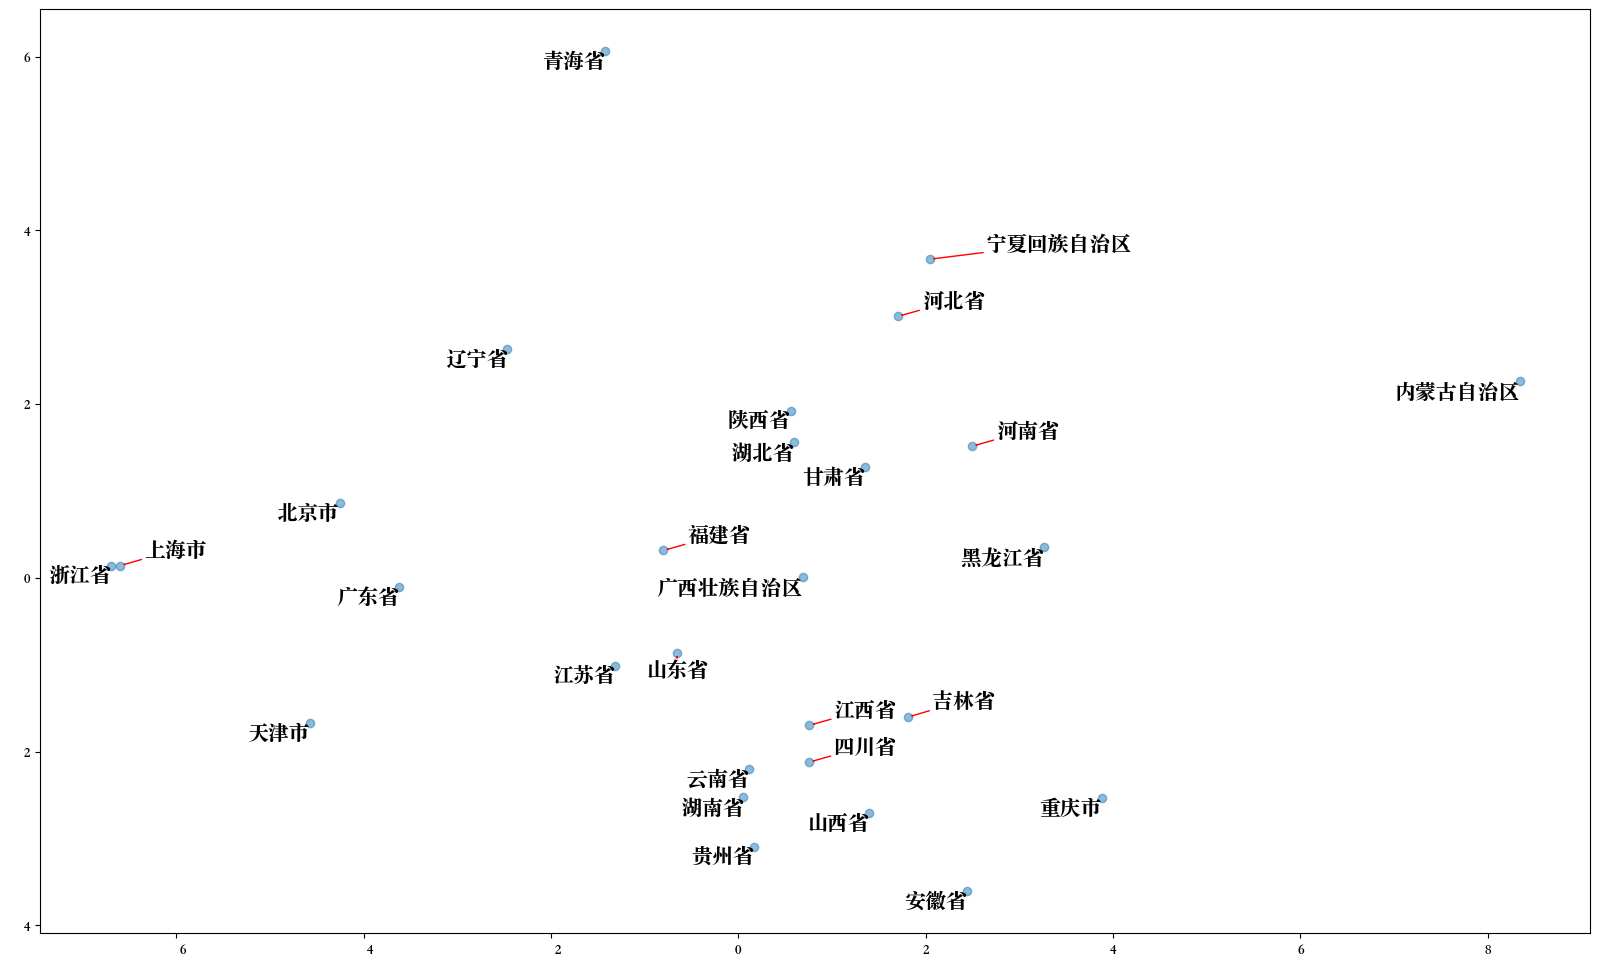

In [9]:
plt.rcParams['font.sans-serif'] = ['Songti SC']
fig = plt.figure(figsize = [20,12])
y1 = scores[:,0]
y2 = scores[:,1]
plt.scatter(y1,y2, alpha = 0.5)

texts = []
for i, province in enumerate(province_data.index):
    texts.append(plt.text(y1[i], y2[i], province, size=15))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

An observable pattern is that provinces that are close geographically or economically are plotted closer. For example, more advanced provinces such as Zhejiang, Guangdong, Liaoning and major municipal cities are closer to each other on the left part of the plot. In future study, I will consider taking other socio-economic or demographic information into the study and explore their potential relationship with score of different geographic areas on the two dimensions.